In [1]:
import numpy as np
from scipy.fft import fft, fftfreq, fftshift, ifft
import matplotlib.pyplot as plt

Task 1

(0, 15)

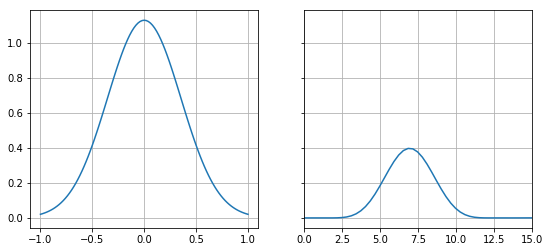

In [62]:
d = 0.5
m = 104.455
h_bar = 0.65828
x0 = 0
p0 = np.sqrt(2*m*0.1)

xmax = 2*d
xmin = -xmax

N = 101
x = np.linspace(xmin, xmax, N, endpoint=True)
y = (1/np.power(np.pi*d**2,0.25))*np.exp(-((x-x0)**2)/(2*d**2))*np.exp(1.j*p0*(x-x0)/h_bar)

N_fft = 10*N
xf = fftshift(fftfreq(N_fft, np.mean(np.diff(x))))
yf = fftshift(fft(y, N_fft))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey='row')
axes[0].plot(x, np.abs(y)**2)
axes[0].grid()
axes[1].plot(2*np.pi*xf, (1/N**2)*np.abs(yf)**2)
axes[1].grid()
axes[1].set_xlim([0, 15])

Task 2: Split FFT

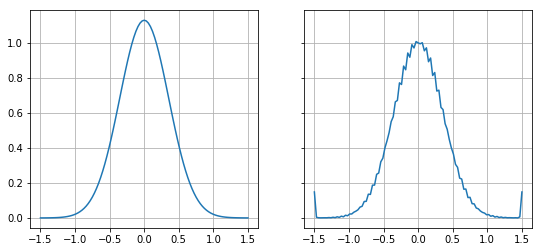

In [166]:
N = 101
dt=0.01
d = 0.5
xmax = 3*d
xmin = -xmax
x = np.linspace(xmin, xmax, N, endpoint=True)
dx = np.mean(np.diff(x))

#kmax = 1/(2*dx)
kmax = (np.pi)/(dx)
kmin = -kmax
kappa = np.linspace(kmin, kmax, N, endpoint=True)
k0 = p0 / h_bar

U = 0

# Wave function in real space
psi_j = (1/np.power(np.pi*d**2,0.25))*np.exp(-((x-x0)**2)/(2*d**2))*np.exp(1.j*p0*(x-x0)/h_bar)

# Discrete Fourier Transform exponential matrix
DFT_exp = np.zeros((N,N), dtype='complex_')
for j in range(N):
    for m in range(N):
        DFT_exp[j,m] = np.exp(-1.j * kappa[m] * x[j])
 

       
# Inverse DFT exp matrix (conjugate transpose)
inv_DFT_exp = np.transpose(np.conjugate(DFT_exp))

k_operator = np.exp(-(1.j/h_bar)*((h_bar*kappa)**2)*dt/(2*m))
#k_operator = np.exp(-(1.j/h_bar)*((h_bar*k0)**2)*dt/(2*m))
r_operator = np.exp(-(1.j/h_bar)*U*dt)

N_fft = 1*N
psi_t = psi_j  # So that we don't mess up with psi_j
t_steps = 6

#print(DFT_exp[87,19])
#print(inv_DFT_exp[19,87])
#
#print(DFT_exp)
#print(inv_DFT_exp)

for i in range(t_steps):
    psi_t = np.multiply(r_operator, psi_t)
    psi_m = np.dot(DFT_exp,psi_t)  # This 1-dim array is the product of DFT matrix and psi_t array
    psi_m = np.multiply(k_operator, psi_m)
    psi_t = (1/N)*np.dot(inv_DFT_exp,psi_m)
    
#for i in range(t_steps):
#    psi_t = r_operator * psi_t
#    psi_t = fftshift(fft(psi_t, N_fft))
#    psi_t = k_operator * psi_t
#    psi_t = fftshift(ifft(psi_t, N_fft))
#    psi_t = r_operator * psi_t

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey='row')
axes[0].plot(x, np.abs(psi_j)**2)
axes[0].grid()
axes[1].plot(x, np.abs(psi_t)**2)
axes[1].grid()

In [60]:
print(kappa)
print(dx)

[-157.07963268 -153.93804003 -150.79644737 -147.65485472 -144.51326207
 -141.37166941 -138.23007676 -135.0884841  -131.94689145 -128.8052988
 -125.66370614 -122.52211349 -119.38052084 -116.23892818 -113.09733553
 -109.95574288 -106.81415022 -103.67255757 -100.53096491  -97.38937226
  -94.24777961  -91.10618695  -87.9645943   -84.82300165  -81.68140899
  -78.53981634  -75.39822369  -72.25663103  -69.11503838  -65.97344573
  -62.83185307  -59.69026042  -56.54866776  -53.40707511  -50.26548246
  -47.1238898   -43.98229715  -40.8407045   -37.69911184  -34.55751919
  -31.41592654  -28.27433388  -25.13274123  -21.99114858  -18.84955592
  -15.70796327  -12.56637061   -9.42477796   -6.28318531   -3.14159265
    0.            3.14159265    6.28318531    9.42477796   12.56637061
   15.70796327   18.84955592   21.99114858   25.13274123   28.27433388
   31.41592654   34.55751919   37.69911184   40.8407045    43.98229715
   47.1238898    50.26548246   53.40707511   56.54866776   59.69026042
   62.8

In [9]:
A = np.array([[1,1],[2,2]])
B = np.array([2,4])
C = np.dot(A,B)
C

array([ 6, 12])

In [22]:
A = np.array([[1j,1],[2j,2]])
B = np.conjugate(A)
C = np.transpose(np.conjugate(A))
B

array([[0.-1.j, 1.-0.j],
       [0.-2.j, 2.-0.j]])

In [23]:
C

array([[0.-1.j, 0.-2.j],
       [1.-0.j, 2.-0.j]])

In [82]:
np.multiply([1,2,3],[1,2,3])

array([1, 4, 9])